Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- выделить целевые группы клиентов;
- предложить меры по снижению оттока;
- определить другие особенности взаимодействия с клиентами.

План работы:

1) [Загрузка данных](#Загрузка-данных)
    
2) [Проведение исследовательского анализа данных](#Проведение-исследовательского-анализа-данных)
    
3) [Построение модели прогнозирования оттока клиентов](#Построение-модели-прогнозирования-оттока-клиентов)
    
4) [Кластеризация клиентов](#Кластеризация-клиентов)
    
5) [Формулировка выводов и базовых рекомендаций по работе с клиентами](#Формулировка-выводов-и-базовых-рекомендаций-по-работе-с-клиентами)

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

gym = pd.read_csv('/datasets/gym_churn.csv')
print(gym.shape)
gym

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


*Весомый датасет на 4000 наблюдений. 13 признаков и целевая переменная Churn. Переведем имена столбцов в нижний регистр для дальнейшего удобства работы*

In [2]:
gym.columns = gym.columns.str.lower()
gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Проведение исследовательского анализа данных

### Проверить, есть ли отсутствующие признаки, изучить средние значения и стандартные отклонения

In [3]:
#посмотрим на сводную информацию о наборе данных
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
gym.duplicated().sum()

0

*Среднестатистический клиент 29 лет не живет в районе расположения фитнес-центра, редко участвует в партнетрской программе, групповых занятиях и промо "пригласи друга". Его абонемент длительностью меньше полгода, но и его он полностью не использует. Посещает центр около двух раз за неделю.*

*Нет пропущенных значений, а стандартное отклонение у целевой переменной больше среднего вдвое. Вероятнее всего имеются выбросы, а значение очень вариабельно*

### Посмотреть средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [6]:
gym.groupby('churn').mean().reset_index()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


*Клиенты, ушедшие в отток, имеют меньшее среднее значение по всем признакам. Они меньшше участвовали в промо-акции, абонименты у них также меньшей длительности, да и вообще они менее активны, несмотря на то, что добратся до фитнес центра им быстрее.*

### Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

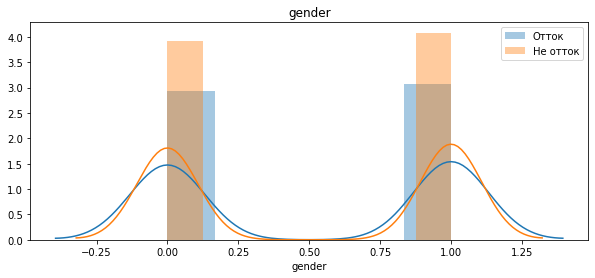

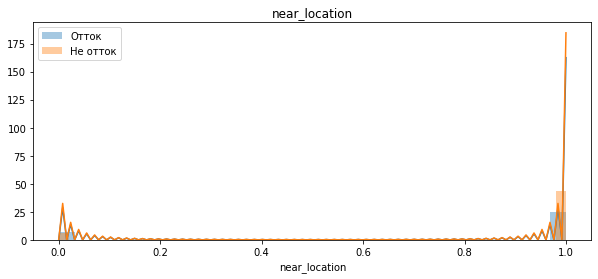

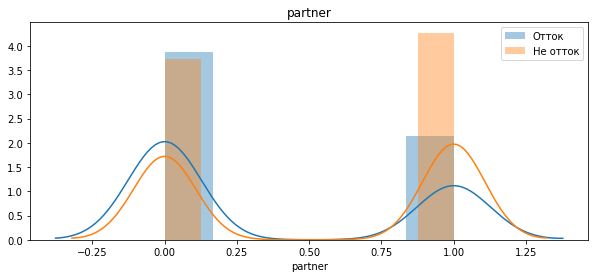

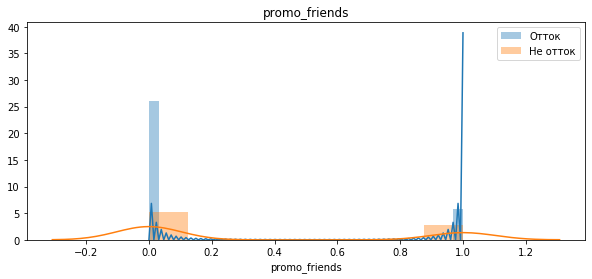

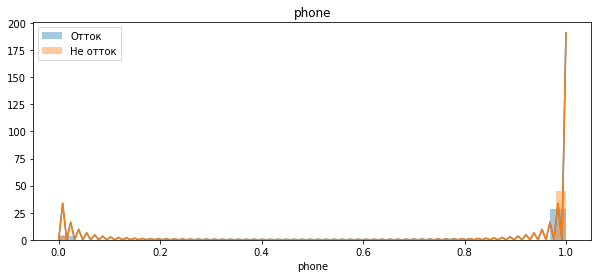

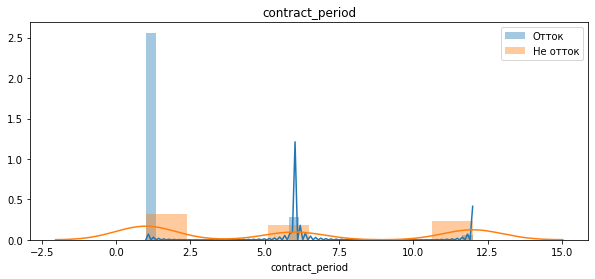

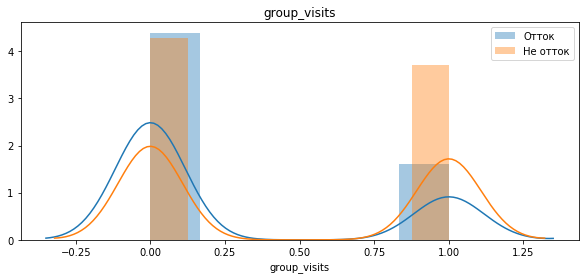

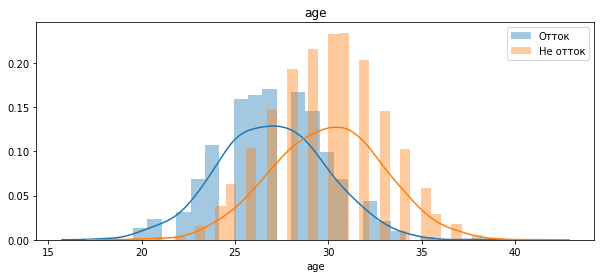

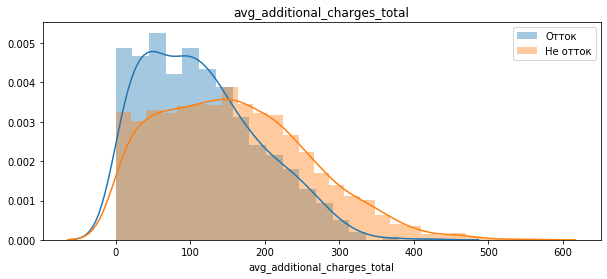

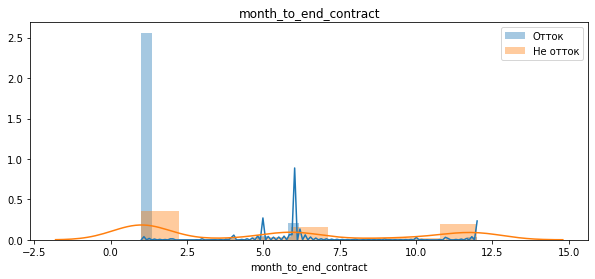

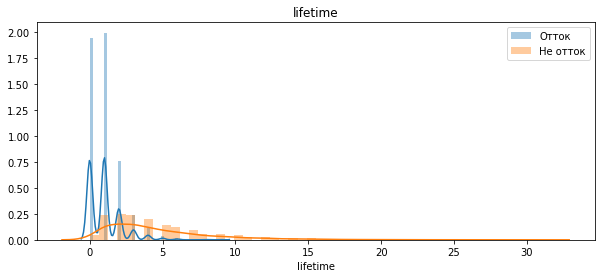

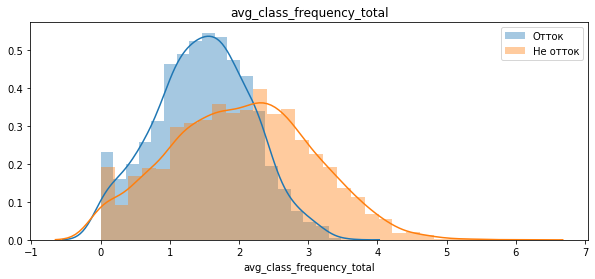

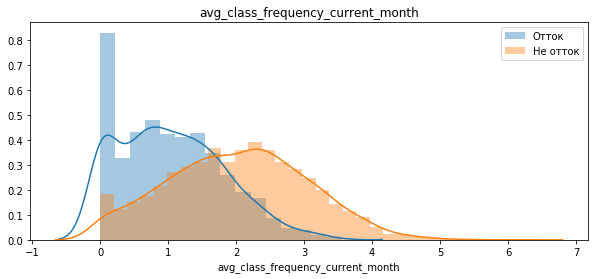

In [7]:
columns = ['gender', 'near_location','partner', 'promo_friends', 'phone', 'contract_period',
           'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract',
           'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
outflow = gym[gym['churn']==1]
inflow = gym[gym['churn']==0]
for column in columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(outflow[column])
    sns.distplot(inflow[column])
    plt.legend(['Отток', 'Не отток'])
    plt.show()

### Построить матрицу корреляций и отобразить её

In [8]:
corr = gym.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1,0.006699,-0.01046,-0.005033,-0.008542,0.0005023,0.01788,0.01381,-0.009334,-0.001281,0.01358,0.01462,0.009156,0.0007077
near_location,0.006699,1,-0.005119,0.211,-0.01576,0.1502,0.1547,0.05836,0.04076,0.144,0.07092,0.04313,0.06266,-0.1281
partner,-0.01046,-0.005119,1,0.452,0.00997,0.3062,0.02271,0.04748,0.02294,0.2946,0.06123,0.02494,0.04556,-0.158
promo_friends,-0.005033,0.211,0.452,1,0.001982,0.2446,0.1202,0.05011,0.0369,0.2396,0.07272,0.02806,0.05377,-0.1622
phone,-0.008542,-0.01576,0.00997,0.001982,1,-0.006893,-0.0101,-0.0114,0.009279,-0.0112,-0.0188,0.00834,0.01337,-0.001177
contract_period,0.0005023,0.1502,0.3062,0.2446,-0.006893,1,0.17,0.1382,0.1114,0.9731,0.1707,0.09621,0.1594,-0.39
group_visits,0.01788,0.1547,0.02271,0.1202,-0.0101,0.17,1,0.08093,0.03208,0.1637,0.07585,0.05669,0.07592,-0.1753
age,0.01381,0.05836,0.04748,0.05011,-0.0114,0.1382,0.08093,1,0.08024,0.1345,0.1647,0.12,0.1831,-0.4047
avg_additional_charges_total,-0.009334,0.04076,0.02294,0.0369,0.009279,0.1114,0.03208,0.08024,1,0.114,0.07903,0.04443,0.07957,-0.1987
month_to_end_contract,-0.001281,0.144,0.2946,0.2396,-0.0112,0.9731,0.1637,0.1345,0.114,1,0.1611,0.08539,0.1476,-0.3814


*С целевой переменной явной корреляции у признаков нет, однако высокий показатель имеется у возраста, времени с момента первого посещения и средней частоты посещений в неделю за предыдущий месяц. Видимо, чем старше клиент и чем чаще он посещает фитнес-центр, тем больше вероятность его ухода. Но сильно коррелируют частота посещения в текущий месяц и частота посещения за весь период, длительность абонемента и количество месяцев до конца абонемента.*

*Удалим взаимозависимые признаки*

In [9]:
gym.drop('month_to_end_contract', axis = 1, inplace = True) 
gym.drop('avg_class_frequency_current_month', axis = 1, inplace = True) 

## Построение модели прогнозирования оттока клиентов

### Разбить данные на обучающую и валидационную выборку

In [10]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Обучить модель на train-выборке двумя способами: логистической регрессией, случайным лесом.

In [11]:
# задаём алгоритм для нашей модели
model_Logistic = LogisticRegression(random_state=0)

# обучаем модель
model_Logistic.fit(X_train, y_train)

#сделаем прогноз
Logistic_predictions = model_Logistic.predict(X_test)
Logistic_probabilities = model_Logistic.predict_proba(X_test)[:, 1]

In [12]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
RandomForest_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучим модель случайного леса
RandomForest_model.fit(X_train, y_train)

#сделаем прогноз
RandomForest_predictions = RandomForest_model.predict(X_test)
RandomForest_probabilities = RandomForest_model.predict_proba(X_test)[:, 1]

### Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?

In [13]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, Logistic_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, Logistic_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, Logistic_predictions)))

Accuracy: 0.88
Precision: 0.76
Recall: 0.77


In [14]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, RandomForest_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, RandomForest_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, RandomForest_predictions)))

Accuracy: 0.89
Precision: 0.78
Recall: 0.77


*Для обучения данной модели алгоритм логистической регрессии показал себя лучше. Это потверждают метрики модели - доля правильных ответов (0.93), точность (0.86) и полнота (0.83). Замечу, что оба алгоритма показали хороший результат*

## Кластеризация клиентов

### Стандартизировать данные. Построить матрицу расстояний на стандартизованной матрице признаков и нарисуйте дендрограмму.  На основании полученного графика предположить, какое количество кластеров можно выделить.

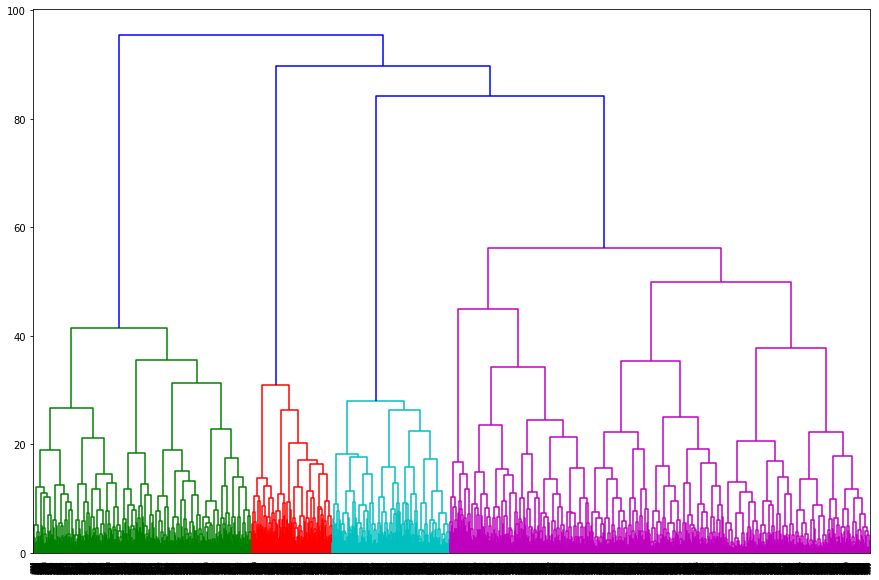

In [15]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym.drop(columns = ['churn']))

# построим матрицу
linked = linkage(x_sc, method = 'ward') 

# рисуем дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

*Предложенное количество кластеров 4, но мне кажется, что их 5. Есть возможность выделить еще один кластер из фиолетового блока*

### Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. Число кластеров принять n=5, чтобы результаты можно было сравнивать с результатами остальных студентов. 

In [16]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
gym['cluster'] = labels

gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,4
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,3
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0,2
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0,1
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497,0,1
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168,1,3
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146,0,1
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108,0,1


### Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [17]:
gym.groupby('cluster').mean().reset_index()

,cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


*Можно отметить 3й кластер, как самый худший. Тут клиенты живут дальше всех от фитнес-центра, они имеют самый минимальный по длительности абонимент, имеют самую малую активность среди всех, а также почти не пользуются другими услугами центра.*

### Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?

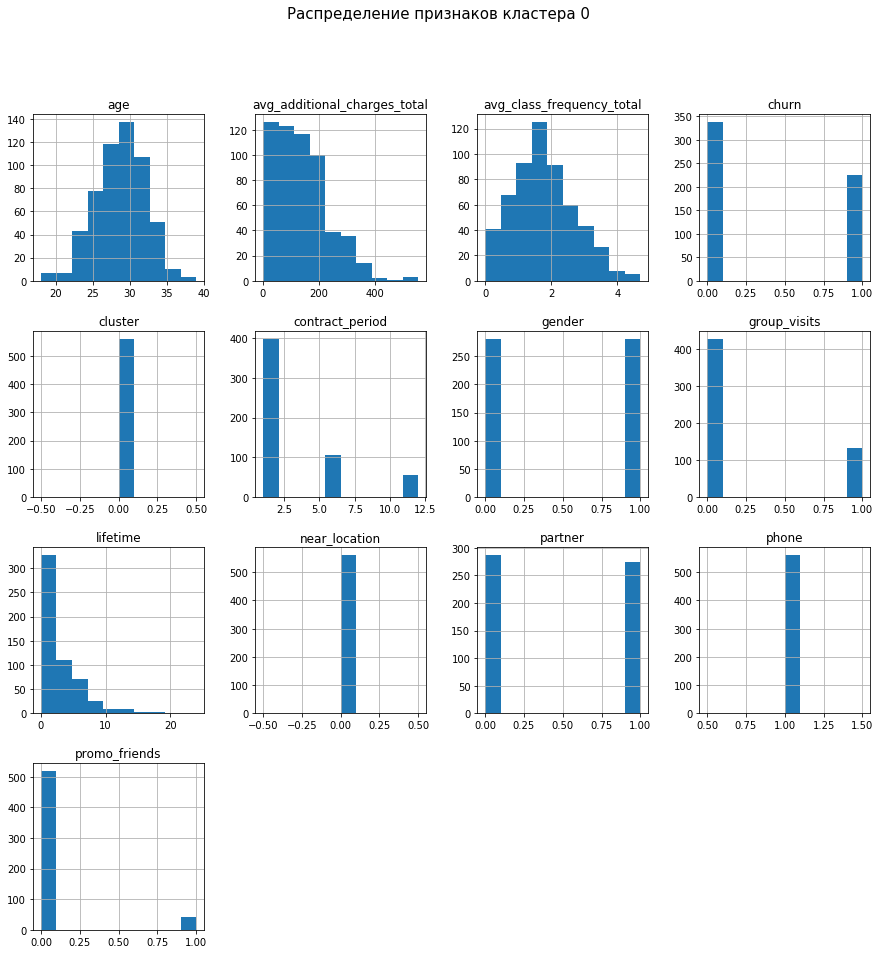

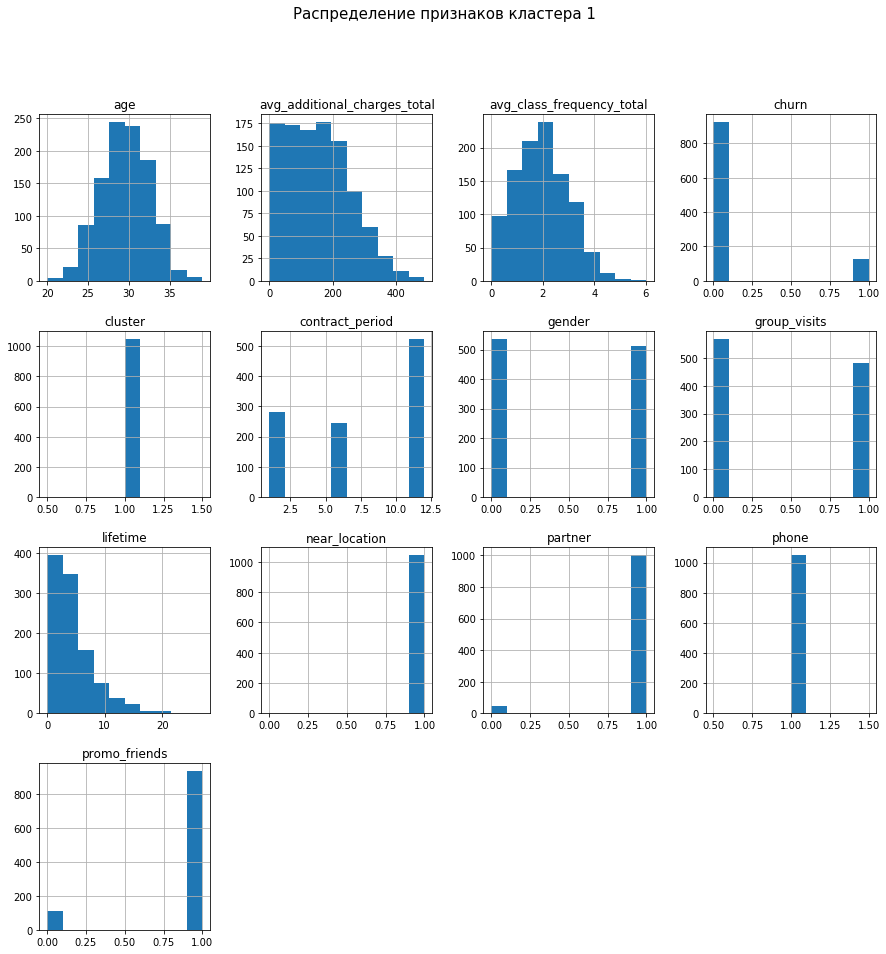

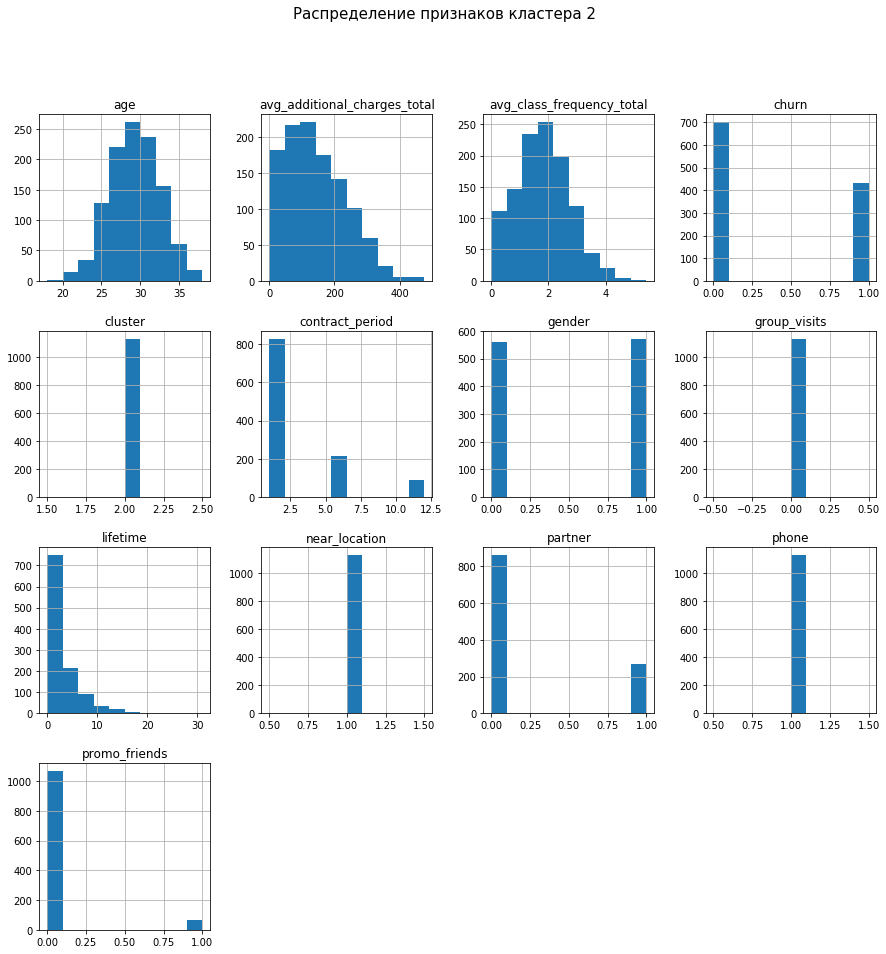

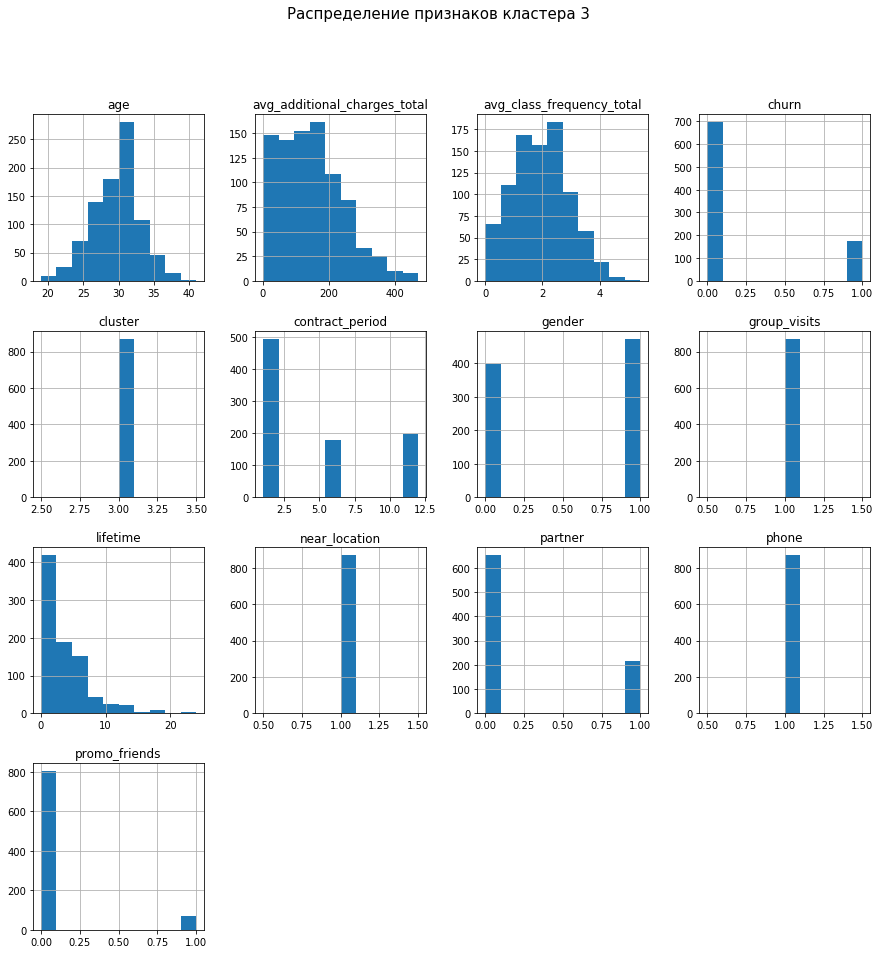

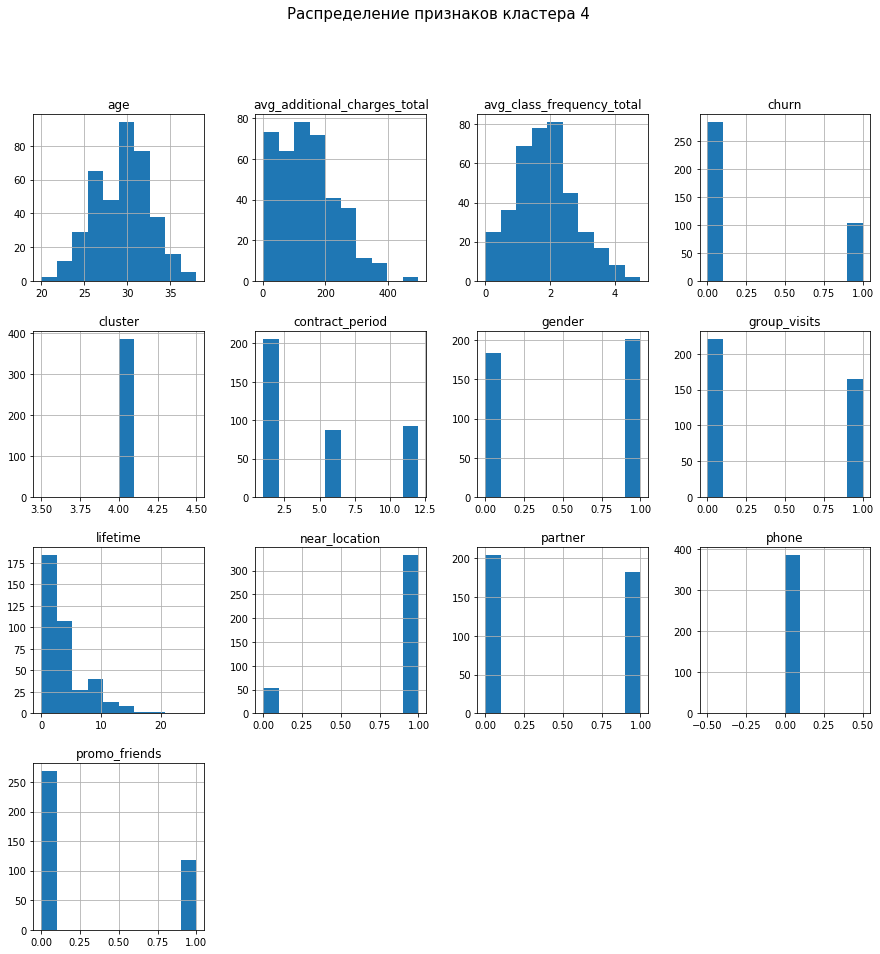

In [18]:
for value in [0, 1, 2, 3, 4]:
    gym[gym['cluster']==value].hist(figsize=(15,15))
    plt.suptitle('Распределение признаков кластера {}'.format(value), fontsize = 15)
    plt.show()

*Гистограммы распределения также указывают больший отток в 3м кластере по сравнению с другими кластерами*

### Для каждого полученного кластера посчитать долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [20]:
gym.query('churn == "1"').groupby('cluster')['churn'].count() / gym.groupby('cluster')['churn'].count() * 100

cluster
0    39.928699
1    12.095238
2    38.162544
3    20.091848
4    26.683938
Name: churn, dtype: float64

*Доля оттока в 3м кластере состовляет 51%. Третий расчет показывающий на него. Самым надежным по доле оттока клиентов является 0й кластер*

## Формулировка выводов и базовых рекомендаций по работе с клиентами

*Была создана модель с неплохой точностью. Об этом свидетельствуют метрики, доля правильных ответов (0.93), точность (0.86) и полнота (0.83). Есть возможность прогноза оттока по каждому клиенту. Явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено. Все клиенты были поделены на 5 кластеров.*

*Выводы по проделанной работе:*

*Кластер 0 самый удачный*

  - самый минимальный отток клиентов - 2.7%

  - самый продолжительный абонимент
 
  - большенство сотрудников компаний-партнёров клуба
  
  - участвуют в промо
  
  - клиенты очень активно пользуются занятиями центра, а также доп. услугами
  
*Кластер 3 самый неудачный*
 
  - самый максимальный по оттоку клиентов - 51%
  
  - клиенты живут дальше всех от фитнес-центра
  
  - не участвуют в проме и не являются партнерами центра
  
  - наименьшая средняя частота посещения 
  
  - минимальная длительность абонимента
  
*Предлагаю делать рекламный акцент на продолжительности абонимента от 6 месяцев. Во всех кластерах данный срок имеет хорошие показатели, несмотря на то, что среднее посещение за неделю сотовляет околу двух раз.*

*Очень мало клиентов оставляют контактный телефон. Я не имею информацию о том, как происходит маркетинговое "общение" с клиентами. Скорее всего, работа в этом направлении может помочь привлечь новых и оставить старых клиентов, тем более, что в промо и партнерской системе в среднем участвует 28% и 48% клиентов соответственно по сумме всех кластеров. Стоит использовать рассылку для информатирования клиетов об акциях и работе центра*

*Еще одна возможность работы с клиентами - несколько путей привлечения: соц. сети, имейл. Возможное использование скидок или других "плюшек" за участие в акциях. Приведи друга не показало эффекта*